# Contexto y Variables

**Contexto:**

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se
enfrentan. El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios
específicos dentro de un mapa.

Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que
esta explote cuando ya ha sido plantada.

Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u).
Los datos han
sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas
por cada jugador dentro de una partida.

Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script. En este miniproyecto trabajaremos con el resultado de este pre-proceso el cual corresponde a un archivo CSV con 79157 filas, cada
una correspondiente a un jugador dentro de una partida. El archivo contiene 36 columnas correspondientes a variables
que describen las acciones del jugador dentro del juego.


**Variables:**

● Map: Nombre del Mapa donde se jugó la partida

● Team: Nombre de equipo al que pertenece el jugador

● MatchId: Identificador de la partida

● RoundId: Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)

● SteamID: Identificador único del jugador

● MatchId: Identificador de la partida

● MatchWinner: Indica si el jugador ganó o no la partida.

● RoundWinner: Indica si el jugador ganó o no la ronda analizada.

● Survived: Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).

● AbnormalMatch: Indica si la partida tuvo un error por conexión de red

● TimeAlive: Indica el tiempo en segundos que el jugador estuvo vivo durante el juego

● ScaledTimeAlive: Tiempo de vida del jugador
escalado al tiempo de vida del jugador que más duró en la ronda.

● AvgCentroidDistance: Distancia promedio del jugador al centroide del equipo.

● TravelledDistance: Distancia promedio viajada por el jugador durante la partida.

● AvgSiteDistance: Distancia promedio del jugador al objetivo más cercano.

● AvgRoundVelocity: Velocidad promedio del jugador en la ronda.

● AvgKillDistance: Distancia promedio viajada por el jugador antes de su primer kill.

● RLethalGrenadesThrown/RNonLethalGrenadesThrown: Cantidad de granadas lanzadas, categorizadas en letales
y no-letales.

● PrimaryXXXX: Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG,
Heavy y Pistol.

● [Match|Round]Assists: Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.

● [Match|Round]Kills: Cantidad de kills efectuados por el jugador durante la partida o la ronda.

● [Match|Round]FlankKills: Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la
partida o la ronda.

● [Match|Round]HeadShots: Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante
la partida o la ronda.

● RoundStartingEquipmentValue: Valor del equipamiento llevado por el jugador al inicio de la ronda.

● TeamStartingEquipmentValue: Valor promedio del equipamiento llevado por el equipo del jugador al inicio de
la ronda.

● AvgMatchKillDist: Distancia promedio viajada por el jugador entre kills.

# Objetivo del Modelo

* A traves de este Dataset del videojuego Counter Strike: GO, se busca predecir cuando el jugador tiene la posibilidad de ganar una partida.

* Para esto, se seleccionarán distintas variables que permitan hacer un modelo confiable, cumpliendo con las preguntas que surgen en el análisis exploratorio, por lo cual, se comenzara a analisar los datos que tengan mayor relevancia en el resultado de la partida.




# Importe de librerías

Antes de empezar vamos a importar las siguientes librerías:

*   Numpy
*   Pandas
*   Seaborn
*   Matplotlib
*   Scikit Learn

In [ ]:
# Importa las librerías a nuestro entorno de trabajo
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Cargar datos




In [ ]:
name = "B_demo_round_traces.csv"
df = pd.read_csv(name, sep=";")

# Parte 1: Análisis Exploratorio y Procesamiento

Acá se encuentra el análisis exploratorio del dataframe "B_demo_round_traces"


Etiqueta: MatchWinner
* True = Ganador
* False = Perdedor

In [ ]:
df.shape

(79157, 37)

Se encuentran 79157 filas y 37 columnas en el Dataframe

---



In [ ]:
df.head(10)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,254527.691176
5,605,de_inferno,CounterTerrorist,2,4,1,76561198106907258,True,False,True,...,0,0,0,850,3750,0,0,0,0,437982.273268
6,606,de_inferno,CounterTerrorist,2,4,1,76561198019196091,True,False,True,...,0,0,0,400,3750,0,0,0,0,335133.830648
7,607,de_inferno,CounterTerrorist,2,4,1,76561197965932989,True,False,True,...,1,0,0,800,3750,0,0,1,0,312706.360002
8,608,de_inferno,CounterTerrorist,2,4,1,76561198001822267,True,False,True,...,0,1,1,850,3750,3,1,0,1,365548.186823
9,609,de_inferno,CounterTerrorist,2,4,1,76561198006466707,True,False,True,...,0,2,0,850,3750,2,0,0,2,307554.991424



Se muestra la información del Dataframe.



---




In [ ]:
df.columns

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'SteamId', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
       'TimeAlive', 'ScaledTimeAlive', 'AvgCentroidDistance',
       'TravelledDistance', 'AvgRoundVelocity', 'AvgKillDistance',
       'AvgSiteDistance', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown',
       'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy',
       'PrimarySMG', 'PrimaryPistol', 'FirstKillTime', 'RoundKills',
       'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots',
       'AvgMatchKillDist'],
      dtype='object')

Se aprecian los nombres de cada columna (características) que componen el Dataframe.



---



In [ ]:
#Revisar los valores unicos de cada caraceristica
for col in df.columns:
  print(col, ':', df[col].unique())

Unnamed: 0 : [   600    601    602 ... 123777 123778 123779]
Map : ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']
Team : ['Terrorist' 'CounterTerrorist']
InternalTeamId : [1 2]
MatchId : [  4   6   9  10  11  12  13  14  15  16  17  18  19  20  21  22  25  26
  27  28  29  30  31  33  35  36  37  39  40  43  44  45  47  49  50  52
  53  55  56  57  58  60  61  62  65  68  69  72  73  75  78  79  80  81
  82  83  85  86  87  88  89  99 100 101 104 105 106 108 109 113 114 115
 116 117 118 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 167 169 170 171 172
 174 175 179 180 181 182 184 185 187 188 190 191 192 194 195 196 197 201
 203 204 205 206 207 209 211 212 213 214 216 217 218 219 220 221 222 224
 225 228 229 232 235 236 237 239 240 241 242 243 245 249 250 251 255 256
 258 262 263 264 265 266 270 274 278 281 282 285 288 290 297 298 299 302
 303 305 

Se muestran los valores únicos de cada columna del Dataframe.



---



In [ ]:
df.dtypes

Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
SteamId                          int64
RoundWinner                       bool
MatchWinner                       bool
Survived                          bool
AbnormalMatch                     bool
TimeAlive                      float64
ScaledTimeAlive                float64
AvgCentroidDistance            float64
TravelledDistance              float64
AvgRoundVelocity               float64
AvgKillDistance                float64
AvgSiteDistance                float64
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime            

Se observa los tipos de datos, habiendo datos categoricos, booleans, float y int.



---



In [ ]:
#revisamos la cantidad de nulos en cada caracteristica
for col in df.columns:
  print(col, '=',df[col].isna().sum())

Unnamed: 0 = 0
Map = 0
Team = 0
InternalTeamId = 0
MatchId = 0
RoundId = 0
SteamId = 0
RoundWinner = 0
MatchWinner = 0
Survived = 0
AbnormalMatch = 0
TimeAlive = 0
ScaledTimeAlive = 0
AvgCentroidDistance = 0
TravelledDistance = 0
AvgRoundVelocity = 0
AvgKillDistance = 0
AvgSiteDistance = 0
RLethalGrenadesThrown = 0
RNonLethalGrenadesThrown = 0
PrimaryAssaultRifle = 0
PrimarySniperRifle = 0
PrimaryHeavy = 0
PrimarySMG = 0
PrimaryPistol = 0
FirstKillTime = 0
RoundKills = 0
RoundAssists = 0
RoundHeadshots = 0
RoundFlankKills = 0
RoundStartingEquipmentValue = 0
TeamStartingEquipmentValue = 0
MatchKills = 0
MatchFlankKills = 0
MatchAssists = 0
MatchHeadshots = 0
AvgMatchKillDist = 0


Se busca encontrar valores nulos dentro del Dataframe por cada columna, en donde no hay ningun nulo.



---



In [ ]:
df.describe()

,Unnamed: 0,InternalTeamId,MatchId,RoundId,SteamId,TimeAlive,ScaledTimeAlive,AvgCentroidDistance,TravelledDistance,AvgRoundVelocity,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
count,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04,79157.000000,79157.000000,7.915700e+04,7.915700e+04,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,7.915700e+04
mean,60570.193640,1.500006,250.525033,12.765517,7.656120e+16,72.795720,0.829561,1.122538e+06,1.041888e+05,84.351773,...,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484,6.288927e+05
std,36436.598386,0.500003,149.557804,7.432837,3.342137e+07,48.321035,0.210842,1.134700e+06,3.543487e+05,171.890139,...,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752,3.402574e+05
min,600.000000,1.000000,4.000000,1.000000,7.656120e+16,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,30830.000000,1.000000,128.000000,6.000000,7.656120e+16,47.080072,0.698892,2.578825e+05,5.898255e+04,56.202641,...,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000,4.097790e+05
50%,56720.000000,2.000000,236.000000,12.000000,7.656120e+16,69.239615,0.922777,7.409804e+05,8.601557e+04,83.617316,...,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000,5.542432e+05
75%,90639.000000,2.000000,373.000000,19.000000,7.656120e+16,92.647813,1.000000,1.753172e+06,1.213966e+05,104.131144,...,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000,7.524568e+05
max,123779.000000,2.000000,511.000000,36.000000,7.656120e+16,2990.560394,2.000000,2.202346e+07,3.964645e+07,24111.819781,...,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000,5.170168e+06


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,6.057019e+04,3.643660e+04,6.000000e+02,3.083000e+04,5.672000e+04,9.063900e+04,1.237790e+05
InternalTeamId,79157.0,1.500006e+00,5.000032e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
MatchId,79157.0,2.505250e+02,1.495578e+02,4.000000e+00,1.280000e+02,2.360000e+02,3.730000e+02,5.110000e+02
RoundId,79157.0,1.276552e+01,7.432837e+00,1.000000e+00,6.000000e+00,1.200000e+01,1.900000e+01,3.600000e+01
SteamId,79157.0,7.656120e+16,3.342137e+07,7.656120e+16,7.656120e+16,7.656120e+16,7.656120e+16,7.656120e+16
TimeAlive,79157.0,7.279572e+01,4.832104e+01,0.000000e+00,4.708007e+01,6.923962e+01,9.264781e+01,2.990560e+03
ScaledTimeAlive,79157.0,8.295609e-01,2.108421e-01,0.000000e+00,6.988916e-01,9.227766e-01,1.000000e+00,2.000000e+00
AvgCentroidDistance,79157.0,1.122538e+06,1.134700e+06,0.000000e+00,2.578825e+05,7.409804e+05,1.753172e+06,2.202346e+07
TravelledDistance,79157.0,1.041888e+05,3.543487e+05,0.000000e+00,5.898255e+04,8.601557e+04,1.213966e+05,3.964645e+07
AvgRoundVelocity,79157.0,8.435177e+01,1.718901e+02,0.000000e+00,5.620264e+01,8.361732e+01,1.041311e+02,2.411182e+04


Se muestran las medidas de tendencia central junto con sus cuartiles.

---
Por ejemplo:
* El promedio de jugadores que estuvo con vida durante el juego es de 72.795720 segundos, mientras que el maximo es de 2990.560394 segundos.



## Parte 1.1: Análisis Exploratorio acorde a la variable objetivo (MatchWinner)


###¿Cuántas victorias y derrotas tiene el Dataframe?


---






In [ ]:
print(df.groupby('MatchWinner').size())


MatchWinner
False    42018
True     37139
dtype: int64


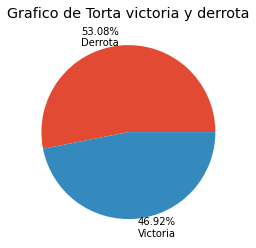

In [ ]:
match = df.groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(match[0]/df.shape[0]*100,2))+'%\nDerrota',
           str(round(match[1]/df.shape[0]*100,2))+'%\nVictoria']
plt.title('Grafico de Torta victoria y derrota')
plt.pie(match, labels=leyenda)
plt.show()

- Se encuentran 42018 derrotas en el Dataframe.
- Se encuentran 37139 victorias en el Dataframe.

###¿Cuántas victorias y derrotas hay según cada equipo?

---




In [ ]:
print('-----GRUPO TERRORIST------')
print(df[df.Team == 'Terrorist'].groupby('MatchWinner').size())
print('\n-----GRUPO CounterTerrorist------')
print(df[df.Team == 'CounterTerrorist'].groupby('MatchWinner').size())

-----GRUPO TERRORIST------
MatchWinner
False    20013
True     19579
dtype: int64

-----GRUPO CounterTerrorist------
MatchWinner
False    22005
True     17560
dtype: int64


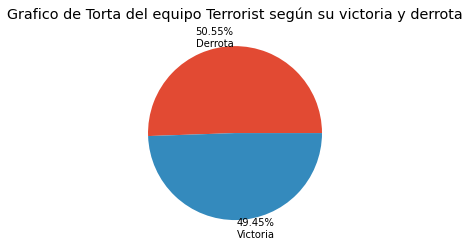

-----------------------------------------------------------------------------


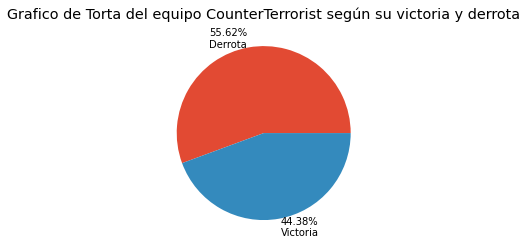

In [ ]:
team = df[df.Team == 'Terrorist'].groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(team[0]/df[df.Team == 'Terrorist'].shape[0]*100,2))+'%\nDerrota',
           str(round(team[1]/df[df.Team == 'Terrorist'].shape[0]*100,2))+'%\nVictoria']
plt.title('Grafico de Torta del equipo Terrorist según su victoria y derrota')
plt.pie(team, labels=leyenda)
plt.show()

print('-----------------------------------------------------------------------------')

team = df[df.Team == 'CounterTerrorist'].groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(team[0]/df[df.Team == 'CounterTerrorist'].shape[0]*100,2))+'%\nDerrota',
           str(round(team[1]/df[df.Team == 'CounterTerrorist'].shape[0]*100,2))+'%\nVictoria']
plt.title('Grafico de Torta del equipo CounterTerrorist según su victoria y derrota')
plt.pie(team, labels=leyenda)
plt.show()


- Se observa que el equipo con mayores victorias es el Team Terrorist con un 49,45%.
- Se observa que el equipo con mayores derrotas es el Team CounterTerrorist con un 55.62%.

### - ¿Cuántos jugadores sobrevivientes ganaron y cuantos perdieron?

### - ¿Cuántos jugadores no sobrevivientes ganaron y cuantos perdieron?

---






In [ ]:
print('-----Sobrevivientes------')
print(df[df.Survived == True].groupby('MatchWinner').size())
print('\n-----No Sobrevivientes------')
print(df[df.Survived == False].groupby('MatchWinner').size())

-----Sobrevivientes------
MatchWinner
False    19737
True     12206
dtype: int64

-----No Sobrevivientes------
MatchWinner
False    22281
True     24933
dtype: int64


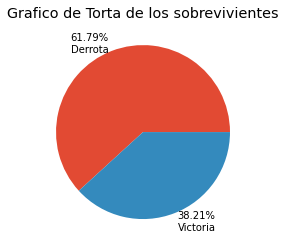

-----------------------------------------------------------------------------


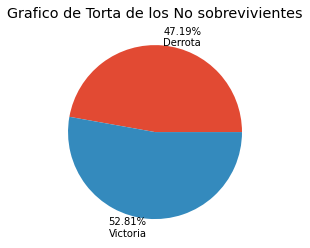

In [ ]:
survived = df[df.Survived == True].groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(survived[0]/df[df.Survived == True].shape[0]*100,2))+'%\nDerrota',
           str(round(survived[1]/df[df.Survived == True].shape[0]*100,2))+'%\nVictoria']
plt.title('Grafico de Torta de los sobrevivientes')
plt.pie(survived, labels=leyenda)
plt.show()

print('-----------------------------------------------------------------------------')

survived = df[df.Survived == False].groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(survived[0]/df[df.Survived == False].shape[0]*100,2))+'%\nDerrota',
           str(round(survived[1]/df[df.Survived == False].shape[0]*100,2))+'%\nVictoria']
plt.title('Grafico de Torta de los No sobrevivientes')
plt.pie(survived, labels=leyenda)
plt.show()

- La mayoria de los sobrevivientes tuvieron derrotas con un 61.79%.
- La mayor parte de los no sobrevivientes tuvieron victoria con un 52,81%

###¿Qué Team tiene más sobrevivientes victoriosos?
---

Total de sobrevivientes 31943
Total de sobrevivientes ganadores  del Team CounterTerrorist:  6848
Total de sobrevivientes ganadores del Team Terrorist:  5358
-------------------------------------------------------------------


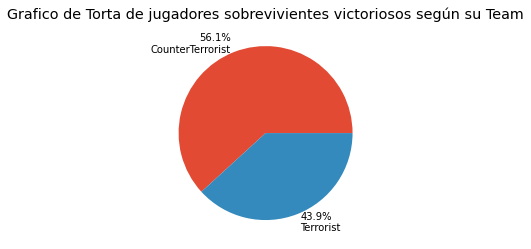

In [ ]:
survived = df[df.Survived == True]
print('Total de sobrevivientes', survived.shape[0])
survivedC = survived[survived.Team == 'CounterTerrorist'].groupby('MatchWinner').size()
survivedT = survived[survived.Team == 'Terrorist'].groupby('MatchWinner').size()
print('Total de sobrevivientes ganadores  del Team CounterTerrorist: ', survivedC[1])
print('Total de sobrevivientes ganadores del Team Terrorist: ', survivedT[1])
print('-------------------------------------------------------------------')

Total = df[df.Survived == True].groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(survivedC[1]/survived[survived.MatchWinner == True].shape[0]*100,2))+'%\nCounterTerrorist',
           str(round(survivedT[1]/survived[survived.MatchWinner  == True].shape[0]*100,2))+'%\nTerrorist']
plt.title('Grafico de Torta de jugadores sobrevivientes victoriosos según su Team')
plt.pie(Total, labels=leyenda)
plt.show()

- El Team con mayor sobrevivientes victoriosos es el CounterTerrorist con un 56.1%.

###¿Qué Team tiene más no sobrevivientes victoriosos?
---



Total de no sobrevivientes 47214
Total de no sobrevivientes que ganaron del Team CounterTerrorist:  10712
Total de no sobrevivientes que ganaron del Team Terrorist:  14221
-------------------------------------------------------------------


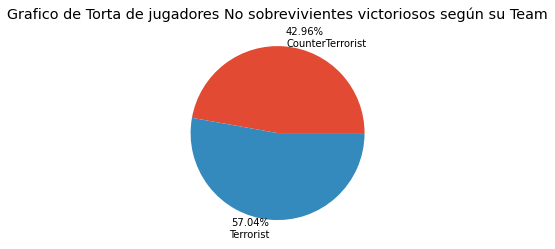

In [ ]:
nosurvived = df[df.Survived == False]
print('Total de no sobrevivientes', nosurvived.shape[0])
nosurvivedT = nosurvived[nosurvived.Team == 'Terrorist'].groupby('MatchWinner').size()
nosurvivedC = nosurvived[nosurvived.Team == 'CounterTerrorist'].groupby('MatchWinner').size()

print('Total de no sobrevivientes que ganaron del Team CounterTerrorist: ', nosurvivedC[1])
print('Total de no sobrevivientes que ganaron del Team Terrorist: ', nosurvivedT[1])
print('-------------------------------------------------------------------')

Total = df[df.Survived == False].groupby('MatchWinner').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(nosurvivedC[1]/nosurvived[nosurvived.MatchWinner == True].shape[0]*100,2))+'%\nCounterTerrorist',
           str(round(nosurvivedT[1]/nosurvived[nosurvived.MatchWinner  == True].shape[0]*100,2))+'%\nTerrorist']
plt.title('Grafico de Torta de jugadores No sobrevivientes victoriosos según su Team')
plt.pie(Total, labels=leyenda)
plt.show()

- El Team con mayor cantidad de no sobrevivientes victoriosos es el equipo Terrorist con un 57.04%.

### ¿Qué Team tiene más sobrevivientes y no sobrevivientes?

---

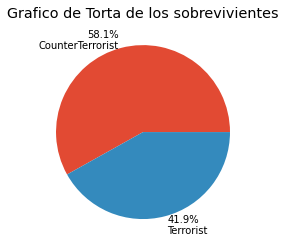

-----------------------------------------------------------------------------


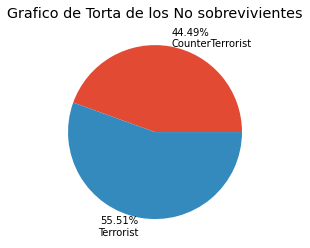

In [ ]:
survived = df[df.Survived == True].groupby('Team').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(survived[0]/df[df.Survived == True].shape[0]*100,2))+'%\nCounterTerrorist',
           str(round(survived[1]/df[df.Survived == True].shape[0]*100,2))+'%\nTerrorist']
plt.title('Grafico de Torta de los sobrevivientes')
plt.pie(survived, labels=leyenda)
plt.show()

print('-----------------------------------------------------------------------------')

survived = df[df.Survived == False].groupby('Team').size()
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(survived[0]/df[df.Survived == False].shape[0]*100,2))+'%\nCounterTerrorist',
           str(round(survived[1]/df[df.Survived == False].shape[0]*100,2))+'%\nTerrorist']
plt.title('Grafico de Torta de los No sobrevivientes')
plt.pie(survived, labels=leyenda)
plt.show()

- El Team que tiene más sobrevivientes es el equipo CounterTerrorist con un 58.1%.
- El Team con mayor cantidad de no sobrevivientes es el equipo Terrorist 55.51%

### ¿Cúal es la distribución del armamento usado por el usuario en las partidas en porcentaje?

---

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd301045e10>,
      dtype=object)

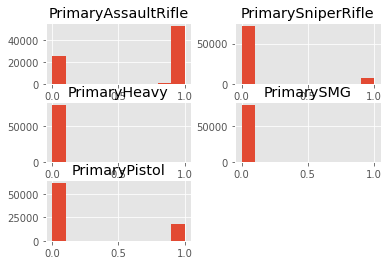

In [ ]:
guns = df[['PrimaryAssaultRifle', 'PrimarySniperRifle','PrimaryHeavy','PrimarySMG','PrimaryPistol']]
guns.hist()

- El armamento con mayor porcentaje en su uso durante la partida es el Assault Rifle, mientras que el armamento menos usado es el Heavy y el SMG.

In [ ]:
guns.describe().T

,count,mean,std,min,25%,50%,75%,max
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0


- El promedio del armamento Assault Rifle es del 67% de uso general en el Dataframe.  

### ¿Cúal es el mapa con mayor victorias?

---

In [ ]:
win = df[df.MatchWinner == True]
lose = df[df.MatchWinner == False]
print('Dataframe con todas las victorias:',win.shape[0])
print('Dataframe con todas las derrotas:',lose.shape[0])


Dataframe con todas las victorias: 37139
Dataframe con todas las derrotas: 42018


Map
de_dust2       9050
de_inferno    13099
de_mirage      9215
de_nuke        5775
dtype: int64


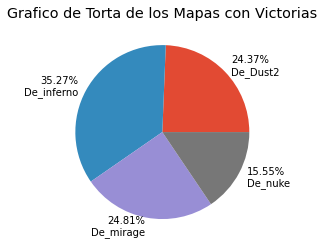

In [ ]:
map = (win.groupby('Map').size())
print(map)
from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(map[0]/win.shape[0]*100,2))+'%\nDe_Dust2',
           str(round(map[1]/win.shape[0]*100,2))+'%\nDe_inferno',
           str(round(map[2]/win.shape[0]*100,2))+'%\nDe_mirage',
           str(round(map[3]/win.shape[0]*100,2))+'%\nDe_nuke']
plt.title('Grafico de Torta de los Mapas con Victorias')
plt.pie(map, labels=leyenda)
plt.show()

- El mapa con mayor victoria es De_inferno 35.27%

### ¿Cúal es el mapa con mayor derrotas?

---

Map
de_dust2      10070
de_inferno    15770
de_mirage      9804
de_nuke        6374
dtype: int64


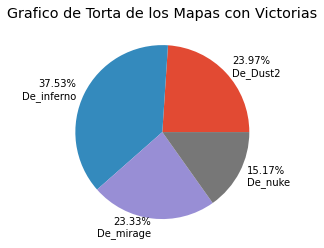

In [ ]:
map = (lose.groupby('Map').size())
print(map)

from sys import last_type
#Construyendo el grafico con las leyendas o etiquietas
leyenda = [str(round(map[0]/lose.shape[0]*100,2))+'%\nDe_Dust2',
           str(round(map[1]/lose.shape[0]*100,2))+'%\nDe_inferno',
           str(round(map[2]/lose.shape[0]*100,2))+'%\nDe_mirage',
           str(round(map[3]/lose.shape[0]*100,2))+'%\nDe_nuke']
plt.title('Grafico de Torta de los Mapas con Victorias')
plt.pie(map, labels=leyenda)
plt.show()

- El mapa con mayor derrota es el De_inferno con un 37.53%

### Distribución de los MatchKills por victorias y derrotas

---

In [ ]:
print('Medidas de tendencia central y cuartiles de MatchKills con victorias')
print(win["MatchKills"].describe())
print('------------------------------------')
print('Medidas de tendencia central y cuartiles de MatchKills con derrotas')
print(lose["MatchKills"].describe())

Medidas de tendencia central y cuartiles de MatchKills con victorias
count    37139.000000
mean         7.284041
std          5.629477
min          0.000000
25%          3.000000
50%          6.000000
75%         11.000000
max         41.000000
Name: MatchKills, dtype: float64
------------------------------------
Medidas de tendencia central y cuartiles de MatchKills con derrotas
count    42018.000000
mean         9.596578
std          6.463911
min          0.000000
25%          4.000000
50%          9.000000
75%         14.000000
max         35.000000
Name: MatchKills, dtype: float64


[Text(0.5, 1.0, 'Distribución de MatchKill en victorias')]

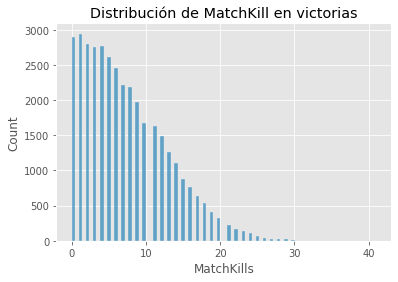

In [ ]:
sb.histplot(data=win, x="MatchKills").set(title="Distribución de MatchKill en victorias")

[Text(0.5, 1.0, 'Distribución de MatchKill en derrotas')]

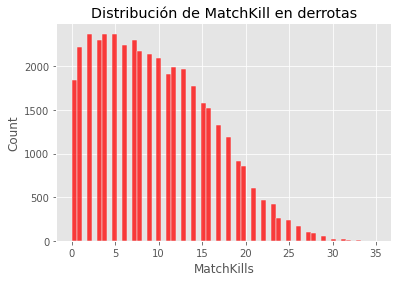

In [ ]:
sb.histplot(data=lose, x="MatchKills",color="red").set(title="Distribución de MatchKill en derrotas")

- Se observa que la mayor cantidad de datos en los MatchKills en victoria y en derrota, están concentrados hacia la izquierda, por lo cual, la mayor cantidad de datos se encuentran en los valores de Kill más bajos y la menor cantidad de datos se encuentran en los valores de Kill más altos.

### Distribución del valor del equipamiento al inicio de la ronda en victorias y derrotas.

---

In [ ]:
print('Medidas de tendencia central y cuartiles de RoundStartingEquipmentValue con victorias')
print(win["RoundStartingEquipmentValue"].describe())
print('------------------------------------')
print('Medidas de tendencia central y cuartiles de RoundStartingEquipmentValue con derrotas')
print(lose["RoundStartingEquipmentValue"].describe())

Medidas de tendencia central y cuartiles de RoundStartingEquipmentValue con victorias
count    37139.000000
mean      3383.437895
std       2157.029143
min          0.000000
25%        850.000000
50%       4350.000000
75%       4850.000000
max       8600.000000
Name: RoundStartingEquipmentValue, dtype: float64
------------------------------------
Medidas de tendencia central y cuartiles de RoundStartingEquipmentValue con derrotas
count    42018.000000
mean      4126.951545
std       2006.409757
min          0.000000
25%       3450.000000
50%       4700.000000
75%       5500.000000
max       8850.000000
Name: RoundStartingEquipmentValue, dtype: float64


[Text(0.5, 1.0, 'Distribución de RoundStartingEquipmentValue en victorias')]

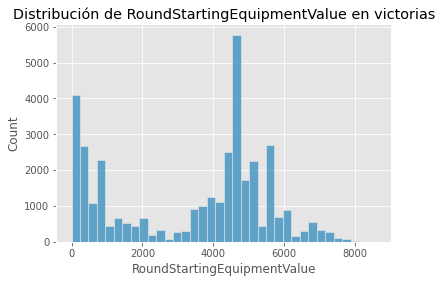

In [ ]:
sb.histplot(data=win, x="RoundStartingEquipmentValue").set(title="Distribución de RoundStartingEquipmentValue en victorias")

[Text(0.5, 1.0, 'Distribución de RoundStartingEquipmentValue en derrotas')]

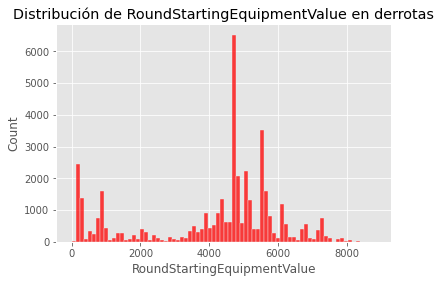

In [ ]:
sb.histplot(data=lose, x="RoundStartingEquipmentValue", color="red").set(title="Distribución de RoundStartingEquipmentValue en derrotas")

- En los RoundStartingEquipmentValue de victoria, la mayor cantidad de datos se encuentran concentrados entre el valor de 4000 a 5000
- En los RoundStartingEquipmentValue de derrota, la mayor cantidad de datos se encuentran concentrados entre el valor de 4000 a 5500


### Distribución del valor del equipamiento del equipo al inicio de la partida por victorias y derrotas.

---

In [ ]:
print('Medidas de tendencia central y cuartiles de TeamStartingEquipmentValue con victorias')
print(win["TeamStartingEquipmentValue"].describe())
print('------------------------------------')
print('Medidas de tendencia central y cuartiles de TeamStartingEquipmentValue con derrotas')
print(lose["TeamStartingEquipmentValue"].describe())

Medidas de tendencia central y cuartiles de TeamStartingEquipmentValue con victorias
count    37139.000000
mean     16916.707504
std      10035.477294
min        600.000000
25%       4550.000000
50%      20900.000000
75%      24750.000000
max      36150.000000
Name: TeamStartingEquipmentValue, dtype: float64
------------------------------------
Medidas de tendencia central y cuartiles de TeamStartingEquipmentValue con derrotas
count    42018.000000
mean     20634.411443
std       9128.957577
min          0.000000
25%      18200.000000
50%      23500.000000
75%      27137.500000
max      35800.000000
Name: TeamStartingEquipmentValue, dtype: float64


[Text(0.5, 1.0, 'Distribución de TeamStartingEquipmentValue en victorias')]

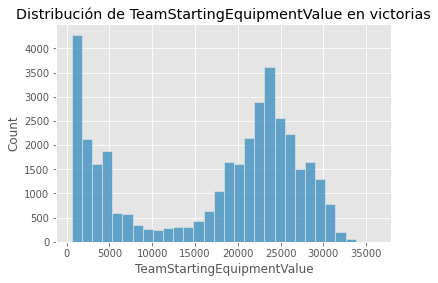

In [ ]:
sb.histplot(data=win, x="TeamStartingEquipmentValue").set(title="Distribución de TeamStartingEquipmentValue en victorias")

[Text(0.5, 1.0, 'Distribución de TeamStartingEquipmentValue en derrotas')]

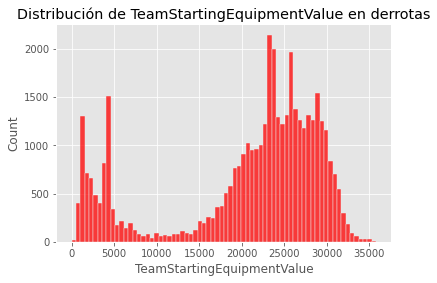

In [ ]:
sb.histplot(data=lose, x="TeamStartingEquipmentValue", color="red").set(title="Distribución de TeamStartingEquipmentValue en derrotas")

- La concentración de datos para ambos histogramas se encuentra inclinados hacia la derecha, esto quiere decir, que la moda entre derrotas y victorias se encuentran entre 2000 y 3000, debido a que es el valor más habitual al inicio de la partida.

### Dispersión de los datos del Time Alive según los MatchKills en partidas ganadas y perdidas.

---

[Text(0.5, 1.0, 'Disperción de datos del TimeAlive con respecto a las MatchKills en partida ganada')]

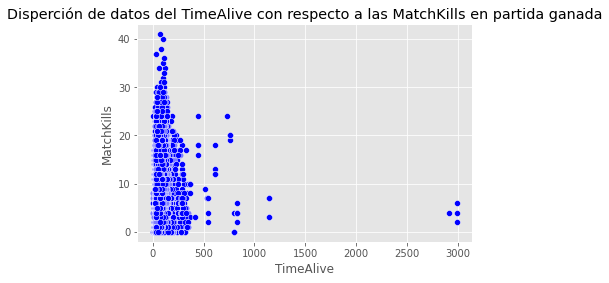

In [ ]:
sb.scatterplot(data=win,x="TimeAlive", y = 'MatchKills', color="blue").set(title="Disperción de datos del TimeAlive con respecto a las MatchKills en partida ganada")

[Text(0.5, 1.0, 'Disperción de datos del TimeAlive con respecto a las MatchKills en partida perdida')]

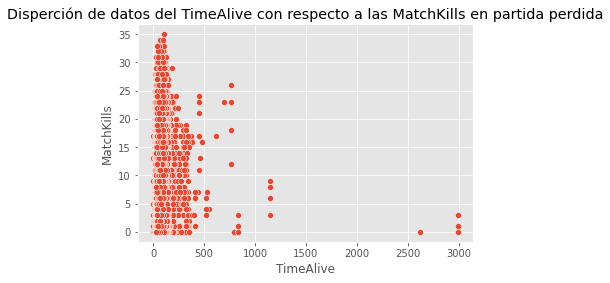

In [ ]:

sb.scatterplot(data=lose,x="TimeAlive", y = 'MatchKills').set(title="Disperción de datos del TimeAlive con respecto a las MatchKills en partida perdida")

- Se muestra que no existe mucha relación entre estar más tiempo con vida con las cantidades de kills hechas por el jugador, ya sea en una partida que perdió o gano.

# Parte 2: Transformación

## Parte 2.1: Eliminar filas que no tienen utilidad para el estudio

Elimar la columa que no tiene valor para el modelo.

* Unnamed: 0 ->  Se elimina debido a que no entrega una información relevante en el estudio, y su función es ser un id de la tabla.




In [ ]:
df = df.drop(['Unnamed: 0'],axis=1)
df

,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,False,...,0,0,0,750,4400,0,0,0,0,501379.183091
1,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,False,...,0,0,0,800,4400,0,0,0,0,208807.587297
2,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,False,...,0,0,0,1000,4400,0,0,0,0,381652.027911
3,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,False,...,0,0,0,850,4400,0,0,0,0,289754.503091
4,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,False,...,0,0,0,1000,4400,0,0,0,0,254527.691176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,de_mirage,CounterTerrorist,2,511,5,76561198024905796,False,False,False,False,...,0,0,0,5600,27100,4,0,2,2,768003.878843
79153,de_mirage,CounterTerrorist,2,511,5,76561198000020858,False,False,False,False,...,0,1,0,5500,27100,8,5,1,3,692262.605640
79154,de_mirage,CounterTerrorist,2,511,5,76561198013485667,False,False,False,False,...,0,0,0,4950,27100,5,0,2,3,161310.783653
79155,de_mirage,CounterTerrorist,2,511,5,76561197972003061,False,False,False,False,...,0,0,0,4950,27100,1,0,1,0,984575.199373


## Parte 2.2: Transformación de datos

  Datos qué se usarán para el modelo que se utilizara en el estudio:
  1. MatchWinner -> Etiqueta del estudio.
  2. Map -> Entrega información sobre cual puede ser el resultado según el mapa en la partida.
  3. Team -> Saber a que equipo pertenece el jugador.
  4. Survived -> Si sobrevivio o no a la partida jugada, puede ser un indicio si gano la partida.
  5. PrimaryAssaultRifle -> Saber si el uso de esta arma asegura mayor porcentaje de victoria.
  6. PrimarySniperRifle -> Saber si el uso de esta arma asegura mayor porcentaje de victoria.
  7. PrimaryHeavy -> Saber si el uso de esta arma asegura mayor porcentaje de victoria.
  8. PrimarySMG -> Saber si el uso de esta arma asegura mayor porcentaje de victoria.
  9. PrimaryPistol -> Saber si el uso de esta arma asegura mayor porcentaje de victoria.
  10. MatchAssists -> Conocer si el jugador aporta en las kills del equipo, para asegurar la victoria.
  11. MatchKills -> Conocer si el jugador realiza en las kills en la partida, para asegurar la victoria.
  12. RoundStartingEquipmentValue -> Nos sirve para conocer si el jugador tiene un valor de equipamiento alto, para determinar su posibilidad de obtener la victoria.
  13. TeamStartingEquipmentValue -> Nos sirve para conocer si el equipo tiene un valor de equipamiento alto, para determinar su posibilidad de obtener la victoria.

In [ ]:
df1 = df[['MatchWinner','Map','Team','Survived','PrimaryAssaultRifle',
          'PrimarySniperRifle','PrimaryHeavy','PrimarySMG','PrimaryPistol','MatchAssists',
          'MatchKills','RoundStartingEquipmentValue','TeamStartingEquipmentValue']]
df1

,MatchWinner,Map,Team,Survived,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,MatchAssists,MatchKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,True,de_inferno,Terrorist,False,0.0,0.0,0.0,0.0,1,0,0,750,4400
1,True,de_inferno,Terrorist,False,0.0,0.0,0.0,0.0,1,0,0,800,4400
2,True,de_inferno,Terrorist,False,0.0,0.0,0.0,0.0,1,0,0,1000,4400
3,True,de_inferno,Terrorist,False,0.0,0.0,0.0,0.0,1,0,0,850,4400
4,True,de_inferno,Terrorist,True,0.0,0.0,0.0,0.0,1,0,0,1000,4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,False,de_mirage,CounterTerrorist,False,1.0,0.0,0.0,0.0,0,2,4,5600,27100
79153,False,de_mirage,CounterTerrorist,False,1.0,0.0,0.0,0.0,0,1,8,5500,27100
79154,False,de_mirage,CounterTerrorist,False,1.0,0.0,0.0,0.0,0,2,5,4950,27100
79155,False,de_mirage,CounterTerrorist,False,0.0,1.0,0.0,0.0,0,1,1,4950,27100


* Team -> 1: Terrorist y 0: CounterTerrorist
* MatchWinner -> 1: True y 0: False
* Survived -> 1: True y 0: False
* Map -> 0: de_dust2 - 1: de_inferno - 2: de_mirage - 3: de_nuke


In [ ]:
#Construiremos un dic de transformacion
dato1 = {True : 1,False : 0}
dato2 = {'Terrorist':1, 'CounterTerrorist':0}
dato3 = {'de_dust2':0, 'de_inferno':1, 'de_mirage':2, 'de_nuke':3}
#Cambiar los datos de la columna MatchWinner, Survived, Team, Map
df1['MatchWinner'] = df1['MatchWinner'].map(dato1)
df1['Survived'] = df1['Survived'].map(dato1)
df1['Team'] = df1['Team'].map(dato2)
df1['Map'] = df1['Map'].map(dato3)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,MatchWinner,Map,Team,Survived,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,MatchAssists,MatchKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,750,4400
1,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,800,4400
2,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,1000,4400
3,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,850,4400
4,1,1,1,1,0.0,0.0,0.0,0.0,1,0,0,1000,4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,0,2,0,0,1.0,0.0,0.0,0.0,0,2,4,5600,27100
79153,0,2,0,0,1.0,0.0,0.0,0.0,0,1,8,5500,27100
79154,0,2,0,0,1.0,0.0,0.0,0.0,0,2,5,4950,27100
79155,0,2,0,0,0.0,1.0,0.0,0.0,0,1,1,4950,27100


## Parte 2.3: Análisis exploratorio posterior a transformación


In [ ]:
df1.shape

(79157, 13)

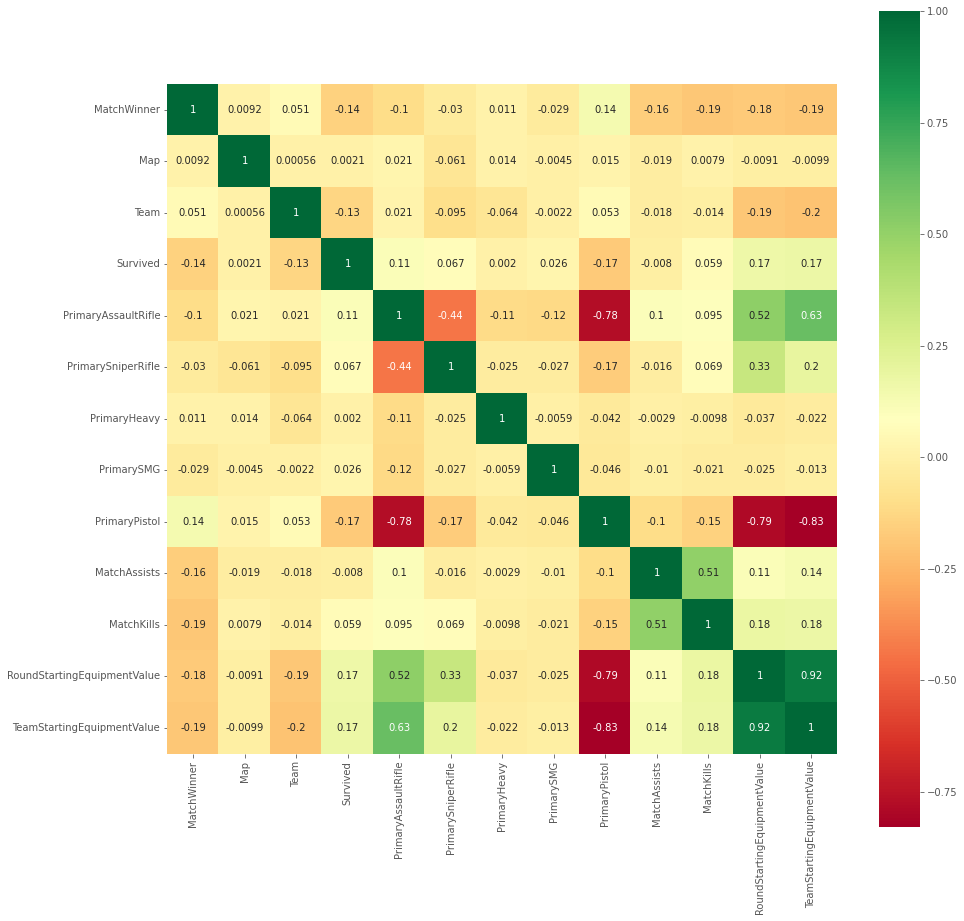

In [ ]:
#Graficando el heatmap para observar
plt.figure(figsize=(15,15))
p = sb.heatmap(df1.corr(),annot=True, cmap='RdYlGn', square=True)

- Con el nuevo Dataframe se encuentran 79157 filas y 13 columnas para el modelo.

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
MatchWinner,79157.0,0.469182,0.499052,0.0,0.0,0.0,1.0,1.0
Map,79157.0,1.305684,1.001151,0.0,1.0,1.0,2.0,3.0
Team,79157.0,0.500171,0.500003,0.0,0.0,1.0,1.0,1.0
Survived,79157.0,0.403540,0.490610,0.0,0.0,0.0,1.0,1.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
MatchAssists,79157.0,1.874831,1.824027,0.0,0.0,1.0,3.0,14.0


- Se observan las medidas de tendencia central de los nuevos datos transformados.

In [ ]:
for col in df1.columns:
  print(col, ':', df1[col].unique())

- Se encuentran los valores únicos del nuevo dataframe.

# Parte 3: Análisis

In [ ]:
#Preparando los datos
from sklearn.model_selection import train_test_split

X = df1.drop('MatchWinner', axis=1)
y = df1['MatchWinner']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=29)

In [ ]:
#Importando Metricas
from sklearn.metrics  import confusion_matrix
from sklearn.metrics  import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics  import f1_score

##Modelo con Clustering

In [ ]:
#Importando las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
#Configurando la grafica
%matplotlib inline
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')

In [ ]:
Y = df1[['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue','MatchKills', 'MatchWinner']]
Y.corr()

,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchWinner
RoundStartingEquipmentValue,1.000000,0.922943,0.179080,-0.175747
TeamStartingEquipmentValue,0.922943,1.000000,0.178526,-0.190423
MatchKills,0.179080,0.178526,1.000000,-0.186289
MatchWinner,-0.175747,-0.190423,-0.186289,1.000000


La correlación es inversa de los atributos con relación a la etiqueta MatchWinner.

---

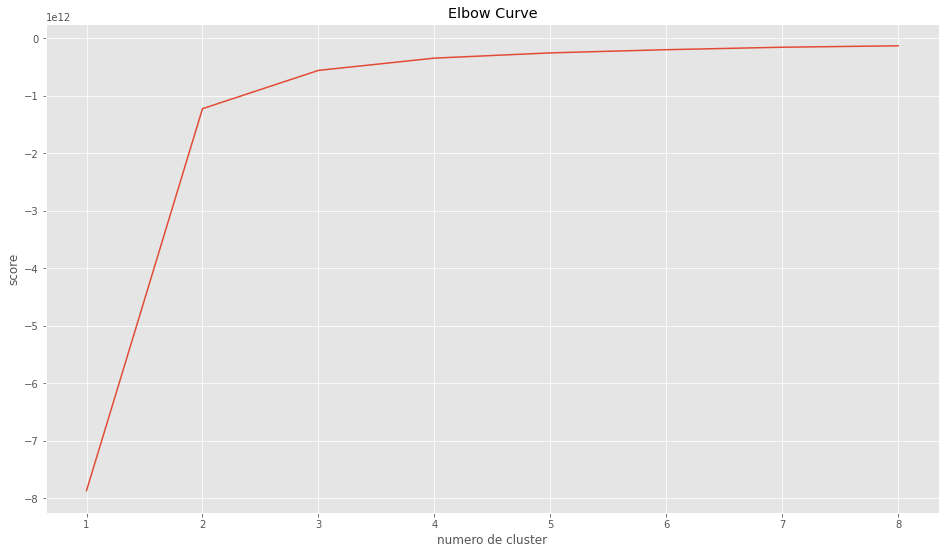

In [ ]:
X = df1[['RoundStartingEquipmentValue', 'TeamStartingEquipmentValue','MatchKills']]
num_cluster = range(1,9)
kmeans = [KMeans(n_clusters=i) for i in num_cluster]
score = [kmeans[i].fit(X).score(X) for i in range(8)]
plt.plot(num_cluster, score)
plt.xlabel('numero de cluster')
plt.ylabel('score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
X.shape

(79157, 3)

In [ ]:
X

,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills
0,750,4400,0
1,800,4400,0
2,1000,4400,0
3,850,4400,0
4,1000,4400,0
...,...,...,...
79152,5600,27100,4
79153,5500,27100,8
79154,4950,27100,5
79155,4950,27100,1


In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

[[4.86502816e+03 2.43047837e+04 9.04902586e+00]
 [7.88590922e+02 3.99740832e+03 7.03335544e+00]]


In [ ]:
labels = kmeans.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

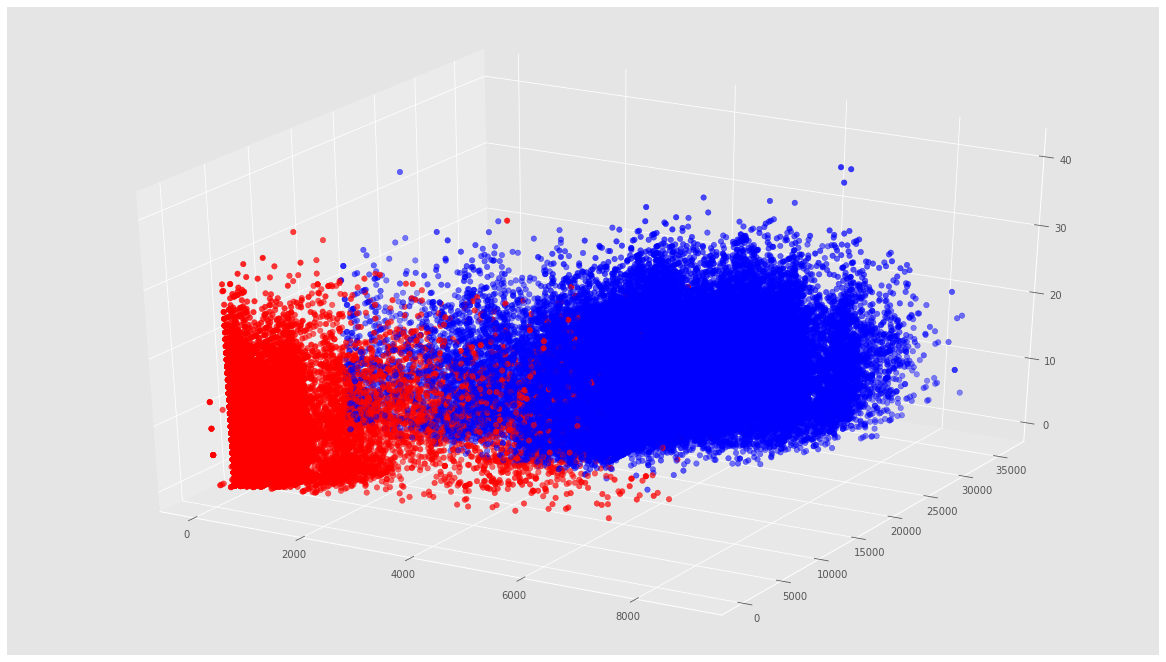

In [ ]:
colores = ['blue','red']
asignar=[]
for pre in labels:
  asignar.append(colores[pre])
X = np.array(X)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1], X[:,2], c=asignar, s=30)
plt.show()

#### Interpretación :

---
>Podemos observar dos grupos en el gráfico 3D. En el cual, logramos interpretar que el grupo rojo son los jugadores que tuvieron la victoria y el grupo azul son los jugadores que perdieron la partida.<br>
>Para llegar a esta interpretación, se analizaron los valores de las variables seleccionadas, en los cuales, la correlación con respecto a la etiqueta es inversa.

#### Predicción:

In [ ]:
X_new = np.array([[5600,27100,4]])
resultado = kmeans.predict(X_new)
print(colores[resultado[0]])

blue


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Mientras mayor valor tenga las caracteristicas: "RoundStartingEquipmentValue","TeamStartingEquipmentValue" y "MatchKills", más probabilidades tienen el jugador de perder.

---




## Modelo con Naive bayes - GaussianNB

In [ ]:
#Construyendo el modelo
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [ ]:
#Revisando el modelo a la luz de metricas
matriz = confusion_matrix(y_test, y_pred)
print(matriz)

[[6141 2254]
 [3954 3483]]


Con el resultado de la Matriz de Confusión, se puede observar que el modelo es poco preciso, ya que los valores en, verdadero positivo y en verdadero negativo en partidas ganadas o perdidas, son muy disparejos con 6141 y 3483.

---

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6078827690752906


Podemos decir, que la exactitud del modelo esta por debajo de lo esperado, el cual es de un aproximado de 0.9, para que el modelo sea lo más confiable posible, sin embargo, la exactitud entregada es de un 0.6, siendo un modelo poco exacto en su predicción.

---

In [ ]:
recall=recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  0.4683340056474385


Con la metrica Recall, obtuvimos que el 46% de los casos positvos fueron correctamente identificados por el algoritmo utilizado.


---

In [ ]:
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

F1 score:  0.5287687870047062


Podemos observar, que al tener la metrica F1 un valor bajo, el modelo no logra clasificar la clase correctamente.

---

In [ ]:
score_e = modelo.score(X_train, y_train)
score_p = modelo.score(X_test, y_test)

print('Precision del modelo (entrenamiento):', score_e)
print('Precision del modelo (prueba)       :', score_p)

Precision del modelo (entrenamiento): 0.6060323726806158
Precision del modelo (prueba)       : 0.6078827690752906


Podemos decir, que el modelo tiene una precisión de 60%, por lo cual, es un modelo poco preciso.

## Modelo con Regresión logistica

In [ ]:
from sklearn import linear_model
from sklearn import model_selection
modelo_logistica = linear_model.LogisticRegression()
modelo_logistica.fit(X_train, y_train)
y_predL = modelo_logistica.predict(X_test)

In [ ]:
score_e = modelo_logistica.score(X_train,y_train)
score_p = modelo_logistica.score(X_test,y_test)
print('Precision del modelo (entrenamiento):', score_e)
print('Precision del modelo (prueba)       :', score_p)

Precision del modelo (entrenamiento): 0.5929727595736282
Precision del modelo (prueba)       : 0.5915234967155129


Podemos ver, que la precisión del modelo, es de un 59%, siendo este un modelo poco confiable.

---

In [ ]:
accuracy = accuracy_score(y_test, y_predL)
print("Accuracy: ",accuracy)

Accuracy:  0.5915234967155129


Podemos decir, que la exactitud del modelo esta por debajo de lo esperado, el cual es de un aproximado de 0.9, para que el modelo sea lo más confiable posible, sin embargo, la exactitud entregada es de un 0.59, siendo un modelo poco exacto en su predicción.

---

In [ ]:
recall=recall_score(y_test, y_predL)
print("Recall: ", recall)

Recall:  0.4171036708350141


Con la metrica Recall, obtuvimos que el 41% de los casos positvos fueron correctamente identificados por el algoritmo utilizado.

---

In [ ]:
f1 = f1_score(y_test, y_predL)
print("F1 score: ", f1)

F1 score:  0.4896219714308263


Podemos observar, que al tener la metrica F1 un valor bajo, el modelo no logra clasificar la clase correctamente.

---

##Modelo con Arbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=29)
modelo.fit(X_train, y_train)
y_predD = modelo.predict(X_test)

In [ ]:
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
print('Profundidad del arbol:', modelo.get_depth())
print('Numero de nodos terminales:', modelo.get_n_leaves())

Profundidad del arbol: 42
Numero de nodos terminales: 21391


In [ ]:
print('Precision del modelo (entrenamiento):', modelo.score(X_train, y_train))
print('Precision del modelo (prueba)       :', modelo.score(X_test, y_test))


Precision del modelo (entrenamiento): 0.9829293328069483
Precision del modelo (prueba)       : 0.6124305204648812


Podemos decir, que la precisión del modelo de entrenamiento es de un 98%, mientras que el modelo de prueba es de un 61%, siendo un modelo poco confiable.


---

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_predD))

Accuracy:  0.6124305204648812


Podemos decir, que la exactitud del modelo esta por debajo de lo esperado, el cual es de un aproximado de 0.9, para que el modelo sea lo más confiable posible, sin embargo, la exactitud entregada es de un 0.61, siendo un modelo poco exacto en su predicción.

---

In [ ]:
recall=recall_score(y_test, y_predD)
print("Recall: ", recall)

Recall:  0.5880059163641254


Con la metrica Recall, obtuvimos que el 58% de los casos positvos fueron correctamente identificados por el algoritmo utilizado.

---

In [ ]:
f1 = f1_score(y_test, y_predD)
print("F1 score: ", f1)

F1 score:  0.587689826636205


Podemos observar, que al tener la metrica F1 un valor bajo, el modelo no logra clasificar la clase correctamente.

---

# Parte 4: Predicciones y Conclusiones

### Prediciendo con el Modelo Arbol de Decisión:


---


> El modelo más confiable por su alto valor en exactitud, es el algoritmo de Arbol de Decisión, por lo cual a continuación se realizara una predicción con los respectivos datos, sin embargo, el algoritmo Clustering, de igual manera nos proporciona un modelo que puede ser considerado confiable, pero este no cuenta con metricas que nos permitan ver su exactitud a comparación a los otros algoritmos.




#### Datos Transformación:

---

* Team -> 1: Terrorist y 0: CounterTerrorist
* MatchWinner -> 1: True y 0: False
* Survived -> 1: True y 0: False
* Map -> 0: de_dust2 - 1: de_inferno - 2: de_mirage - 3: de_nuke

In [ ]:
df1

,MatchWinner,Map,Team,Survived,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,MatchAssists,MatchKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue
0,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,750,4400
1,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,800,4400
2,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,1000,4400
3,1,1,1,0,0.0,0.0,0.0,0.0,1,0,0,850,4400
4,1,1,1,1,0.0,0.0,0.0,0.0,1,0,0,1000,4400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79152,0,2,0,0,1.0,0.0,0.0,0.0,0,2,4,5600,27100
79153,0,2,0,0,1.0,0.0,0.0,0.0,0,1,8,5500,27100
79154,0,2,0,0,1.0,0.0,0.0,0.0,0,2,5,4950,27100
79155,0,2,0,0,0.0,1.0,0.0,0.0,0,1,1,4950,27100


####Predicción con el Modelo:

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=29)
modelo.fit(X_train, y_train)
y_predD = modelo.predict(X_test)

In [ ]:
X_new = pd.DataFrame({'Map': [1], 'Team': [1], 'Survived': [1], 'PrimaryAssaultRifle': [0.8],
                      'PrimarySniperRifle':[0.2],'PrimaryHeavy':[0.0],'PrimarySMG':[0.0],
                      'PrimaryPistol':[0],'MatchAssists':[1],'MatchKills':[8],'RoundStartingEquipmentValue':[700],
                      'TeamStartingEquipmentValue':[4400]
                      })
modelo.predict(X_new)

array([0])

Con los datos proporcionados anteriomente, se puede predecir, que el jugador perdera la Partida.


---

### Conclusión:

---


> A pesar que el algoritmo Árbol de Decisión es el más exacto en su predicción, no esta tan alejado con los resultados en las metricas de los otros algoritmos seleccionados, ya que su score varia entre 0.59 a 0.61.<br>
> Por otro lado, el Dataframe contiene muchos datos categoricos, por lo cual su transformación para poder ser utilizados en el modelo es entre 0 y 1, bajando la posibilidad de tener un mayor rango de datos númericos.

---
### Apreciación:

> Podemos ver que los datos elegidos, tiene una relación inversamente proporcional con la etiqueta elegida "MatchWinner", es decir, que mayor valor tenga las variables seleccionadas en el estudio, la probabilidad de que la persona obtenga la victoria es menor.<br>
>El modelo más confiable seria el árbol de decisión junto con el algoritmo no supervisado "Clustering", en el cual, al colocar valores más altos en sus caracteristicas, la probabilidad de que pierda es mayor en ambos algoritmos.


---
###Sugerencias:

> Para un mejor modelo de predección, es vital conocer mayormente los datos del equipo completo, en vez de conocer los datos individuales de los jugadores, debido a que este juego tiene la dinamica de equipo y no solo un jugador.<br>
> La mayor cantidad de los jugadores no logro pasar más de 8 minutos con vida, por ende, los datos luego de los 10 minutos son datos outliers.<br>
> Para mejor analisis de su victoria y derrota, se debería indicar el resultado de su objetivo, ya sea por parte del Team (explotar o desactivar las bombas), de esta forma se podra hacer un analisis más preciso en su victoria o derrota.


